## torch:sigmoid,tanh,multinomial(probability_vector,num_samples)

## nn:Linear,Relu,nn.PRelu(num_parameters),nn.Softmax(dim=1),nn.MSELoss(),nn.BCELoss(),nn.CrossEntropyLoss(dataset.class_weights),nn.Sequential

## nn:nn.Conv1d(in_channels,out_channels,kernel_size,stride),nn.ELU(),nn.BatchNorm1d(num_features)

## nn:nn.Embedding(embedding_dim,num_embeddings,padding_idx,_weight),nn.RNNCell(input_size,hidden_size),nn.GRU(input_size,hidden_size,batch_first,bidirectional=True)

## nn:nn.utils.clip_grad_norm(model.parameters(),)

## nn.function:sigmoid, relu,dropout,avg_pool1d(,),cross_entropy(y_pred,y_true,ignore_index)

## optim:Adam(params,lr)

## loss.backward(),optimizer.step()

In [1]:
import torch 
import torch.nn as nn
class Perceptron(nn.Module):
    def __init__(self,input_dim):
        super(Perceptron,self).__init__()
        self.fc1=nn.Linear(input_dim,1)
    def forward(self,x_in):
        return torch.sigmoid(self.fc1(x_in)).squeeze()

## sigmoid函式

In [2]:
import torch 
import matplotlib.pyplot as plt
x=torch.range(-5.,5.,0.1)
y=torch.sigmoid(x)
plt.plot(x.numpy(),y.numpy())
plt.show()

C:\Users\a2279\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 640x480 with 1 Axes>

C:\Users\a2279\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  This is separate from the ipykernel package so we can avoid doing imports until


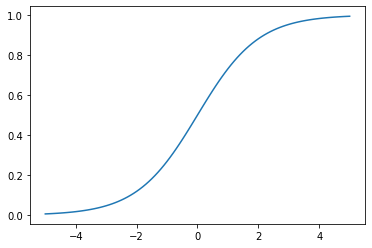

In [3]:
import torch 
import matplotlib.pyplot as plt
x=torch.range(-5.,5.,0.1)
y=torch.sigmoid(x)
plt.plot(x,y)
plt.show()

## tanh

C:\Users\a2279\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  This is separate from the ipykernel package so we can avoid doing imports until


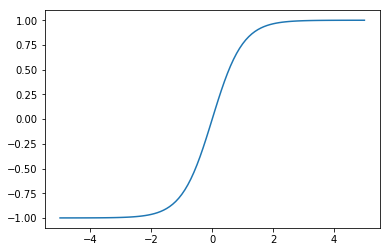

In [4]:
import torch 
import matplotlib.pyplot as plt
x=torch.range(-5.,5.,0.1)
y=torch.tanh(x)
plt.plot(x.numpy(),y.numpy())
plt.show()

C:\Users\a2279\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  after removing the cwd from sys.path.


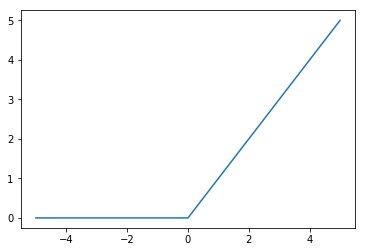

In [5]:
import torch 
import matplotlib.pyplot as plt
relu=torch.nn.ReLU()
x=torch.range(-5.,5.,0.1)
y=relu(x)
plt.plot(x.numpy(),y.numpy())
plt.show()

C:\Users\a2279\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  after removing the cwd from sys.path.


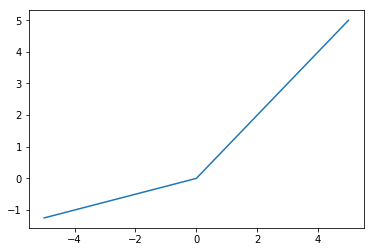

In [8]:
import torch
import matplotlib.pyplot as plt
prelu=torch.nn.PReLU(num_parameters=1)
x=torch.range(-5.,5.,0.1)
y=prelu(x)
plt.plot(x.detach().numpy(),y.detach().numpy())
plt.show()

## Softmax

In [9]:
import torch.nn as nn
import torch
softmax=nn.Softmax(dim=1)
x_input=torch.randn(1,3)
y_output=softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output,dim=1))

tensor([[-1.0229, -0.0215,  0.6150]])
tensor([[0.1128, 0.3070, 0.5802]])
tensor([1.])


## MSE損失

In [10]:
import torch
import torch.nn as nn
mse_loss=nn.MSELoss()
outputs=torch.randn(3,5,requires_grad=True)
targets=torch.randn(3,5)
loss=mse_loss(outputs,targets)
print(loss)

tensor(4.9008, grad_fn=<MseLossBackward>)


## 交叉損失

In [3]:
import torch
import torch.nn as nn
ce_loss=nn.CrossEntropyLoss()
outputs=torch.randn(3,5,requires_grad=True)
targets=torch.tensor([1,0,3],dtype=torch.int64)
loss=ce_loss(outputs,targets)
print(loss)

tensor(2.2916, grad_fn=<NllLossBackward>)


## 二元交叉損失

In [11]:
bce_loss=nn.BCELoss()
sigmoid=nn.Sigmoid()
probabilities=sigmoid(torch.randn(4,1,requires_grad=True))
targets=torch.tensor([1,0,1,0],dtype=torch.float32).view(4,1)
loss=bce_loss(probabilities,targets)
print(probabilities)
print(loss)

tensor([[0.7357],
        [0.7257],
        [0.8781],
        [0.5576]], grad_fn=<SigmoidBackward>)
tensor(0.6365, grad_fn=<BinaryCrossEntropyBackward>)


## Adam 

In [15]:
import torch.nn as nn
import torch.optim as optim
input_dim=2
lr=0.001
perceptron=Perceptron(input_dim=input_dim)
bce_loss=nn.BCELoss()
optimizer=optim.Adam(params=perceptron.parameters(),lr=lr)


## 感知器二元分類

In [23]:
import numpy as np

In [28]:
def get_toy_data(batch_size, left_center=(3, 3), right_center=(3, -2)):
    x_data = []
    y_targets = np.zeros(batch_size)
    for batch_i in range(batch_size):
        if np.random.random() > 0.5:
            x_data.append(np.random.normal(loc=left_center))
        else:
            x_data.append(np.random.normal(loc=right_center))
            y_targets[batch_i] = 1
    return torch.tensor(x_data, dtype=torch.float32), torch.tensor(y_targets, dtype=torch.float32)

In [30]:
n_epochs=20
n_batches=20
batch_size=100
for epoch_i in range(n_epochs):
    for batch_i in range(n_batches):
        x_data,y_target=get_toy_data(batch_size)
        perceptron.zero_grad()
        y_pred=perceptron(x_data)
        loss=bce_loss(y_pred,y_target)
        loss.backward()
        optimizer.step()